### Author: Chan Nok Lam        ,                                                                             Date: 2016-07-27

#### A PDF or HTML file containing your analysis. This file should include:

A note specifying which dataset you analyzed

A statement of the question(s) you posed

A description of what you did to investigate those questions

Documentation of any data wrangling you did

Summary statistics and plots communicating your final results
Code you used to perform your analysis. If you used an iPython notebook, you can submit your .ipynb. Otherwise, you should submit the code separately in .py file(s).
A list of Web sites, books, forums, blog posts, github repositories, etc. that you referred to or used in creating your submission (add N/A if you did not use any such resources).

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [3]:
### 
### Dataset : Titanic



### Questions
Titanic Data
What factors made people more likely to survive??  Does people take 1st class have a higher survival rate? does the fare affect the survival rate?

In [4]:
file_name = 'titanic_data.csv'
df=pd.read_csv(file_name)

### Read the csv file as pandas.dataframe.




In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.describe()
### There is some NaN data in Age, I am going to check what does it mean.
df.replace(to_replace='NaN', value=np.nan, inplace=True)

C:\Users\NokMan\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [7]:
### To check how many data is not available
### for manually looking on the data, NaN in Age column seems really mean missing data not age 0.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
## Since Cabin has almost all NaN value, I will ignore it for this project as it could not provide any information.
## I have keep the field"Age" since the missing data only account for a small proportion. I ignore the NaN data for the analysis.

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [9]:
df=df.drop('PassengerId',axis=1)

In [10]:
## I focus on the correlation with "Survived" as this is the most important variable in the dataset. Its seems have a strongest
## negative correlation with Pclass  and positive correlation with Fare. It is worth to mention "PClass" is a categorial value, 
## 1st class take value of 1,2nd class is 2, 3rd class is 3. It may not be the perfect way to correlate a categorial variable 
## with continous variable, yet it can still demonstrate the negative correlation they have.

## The relation can be interpretd as people in 3rd class are more vulnerable to death, while people who have a high fare is less
## vulnerable to death. I will explore the relation between these 3 variables later.


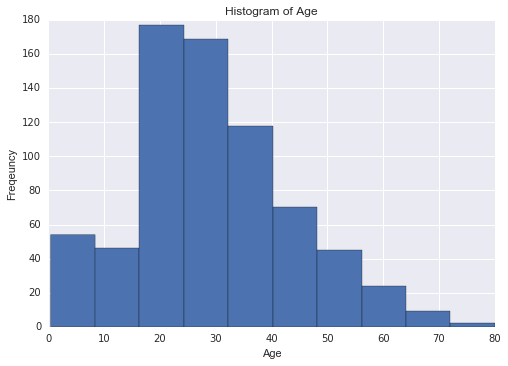

In [175]:
## I want to explore the distribution of the data
df.Age.hist()
plt.xlabel('Age')
plt.ylabel('Freqeuncy')
plt.title('Histogram of Age')
## The data is relatively normal, not obvious outlier exist.



### From the above histogram, I learn some facts about the data. More people die than survive in this dataset. Most of the people lie between around 18 to 32 years old and most of the people are taking the 3rd class.

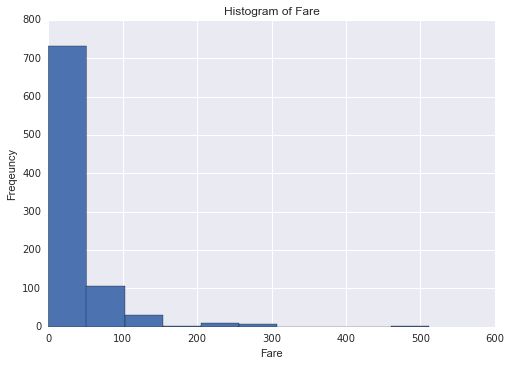

In [173]:
df.Fare.hist() ## Since some outlier exist, a log transfer may 
plt.xlabel('Fare')
plt.ylabel('Freqeuncy')
plt.title('Histogram of Fare')

In [8]:
### Correlation matrix for each variable.
df.corr()
### PassengerID is not useful I think in this case, therefore I will remove it.


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


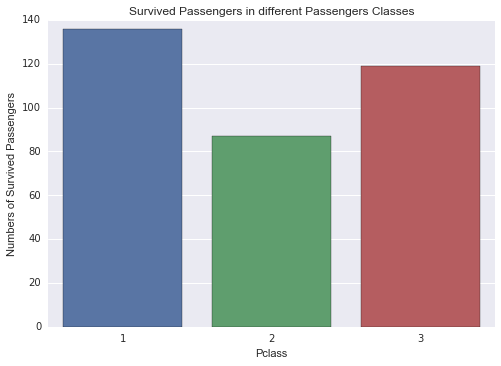

In [69]:
## I then start to explore the relation between Survived, Pclass and Fare
## Survived vs Pclass
seaborn.barplot(x='Pclass',y='Survived',data=df,estimator=sum,ci=0)
plt.ylabel('Numbers of Survived Passengers')
plt.title('Survived Passengers in different Passengers Classes')
### This plot show the survived passengers in different classes, it seems that class 1 has the largest numbers of survival, 
# however, the number is not normalized since each classes has different number of passengers, it will be more easy to judge if
## percentage is shown instead of absolute number.

In [132]:
df.groupby(['Pclass']).Survived.describe()


Pclass       
1       count    216.000000
        mean       0.629630
        std        0.484026
        min        0.000000
        25%        0.000000
        50%        1.000000
        75%        1.000000
        max        1.000000
2       count    184.000000
        mean       0.472826
        std        0.500623
        min        0.000000
        25%        0.000000
        50%        0.000000
        75%        1.000000
        max        1.000000
3       count    491.000000
        mean       0.242363
        std        0.428949
        min        0.000000
        25%        0.000000
        50%        0.000000
        75%        0.000000
        max        1.000000
Name: Survived, dtype: float64

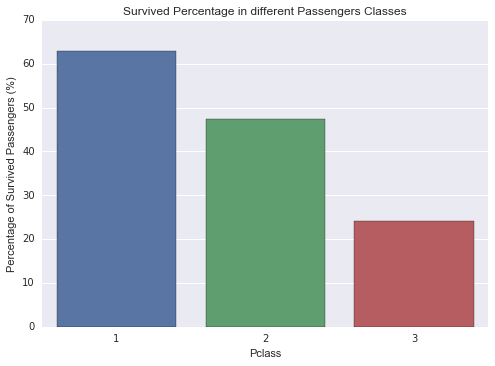

In [139]:
seaborn.barplot(x='Pclass',y='Survived',data=df,ci=0, estimator=lambda x: sum(x)*1.0/len(x)*100)## show the relative percentages in each bin
plt.ylabel('Percentage of Survived Passengers (%)')
plt.title('Survived Percentage in different Passengers Classes')

## It shows that Survival chances did affected by Pclass,class 1 have best chance to survived.

In [140]:
## Table for the above bar chart
df.groupby(['Pclass'])['Survived'].mean()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

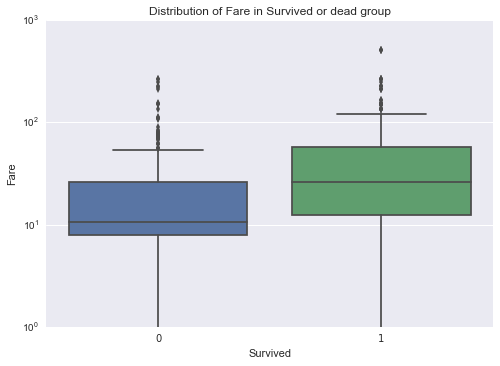

In [134]:
## Survive vs Fare

a=seaborn.boxplot(x='Survived',y='Fare',data=df)
a.set_yscale('log')
## Although there is quite a lot outliers, this graph can tell us people who survived had a larger mean and upper quartile than
##people who died.
plt.title('Distribution of Fare in Survived or dead group')

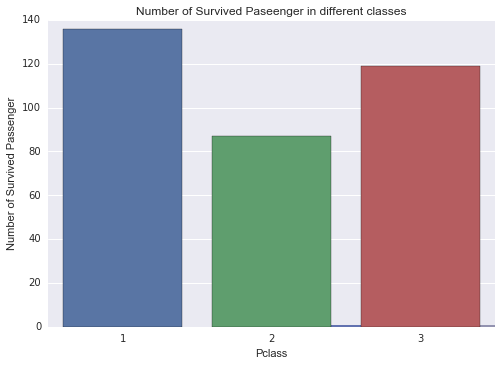

In [108]:
plt.bar(df['Pclass'],df['Survived'],alpha=0.002) ### alpha is added and hope to visualize it better
### It may improve a little bit that I can see darker color for 3rd class people , however, it is still unclear whether any trend
## exist, I will try to express the data in a table rather than a graph.
seaborn.barplot(x='Pclass', y="Survived", data=df, estimator=sum,ci=0)
plt.ylabel('Number of Survived Passenger')
plt.title('Number of Survived Paseenger in different classes')

In [23]:
## Now I will stick to the relation between Pclass and Survive fist.
p1s=0
p2s=0
p3s=0
for pclass, sur in zip(df['Pclass'], df['Survived']):
    if pclass==1:
        if sur==1:
            p1s=p1s+1
    if pclass==2:
        if sur==1:
            p2s=p2s+1
    if pclass==3:
        if sur==1:
            p3s=p3s+1
    
        


In [26]:
print "Pclass=1 : Survive people:",p1s
print "Pclass=1 : Survive people:",p2s
print "Pclass=1 : Survive people:",p3s
print "Total survived people:",df['Survived'].sum() ,p1s+p2s+p3s ## To cross check the loop is working good that it does not miss
##any survived people.

Pclass=1 : Survive people: 136
Pclass=1 : Survive people: 87
Pclass=1 : Survive people: 119
Total survived people: 342 342


In [36]:
print "Pclass=1 : Survive people percentage:", float(p1s)/(df['Pclass']==1).sum()
print "Pclass=2: Survive people percentage:", float(p2s)/(df['Pclass']==2).sum()
print "Pclass=3 : Survive people percentage:", float(p3s)/(df['Pclass']==3).sum()

### By showing the survival percentage instead of absolute survival people, it shows the relation of Pclass and Surivived more
##clear, it is obvious that people take 3rd class have a much lower survival chance than 1st class people.

Pclass=1 : Survive people percentage: 0.62962962963
Pclass=2: Survive people percentage: 0.472826086957
Pclass=3 : Survive people percentage: 0.242362525458


Survived people: [233  70  19   6   7   4   3]
Number of people: [730 108  24   9  11   6   3]


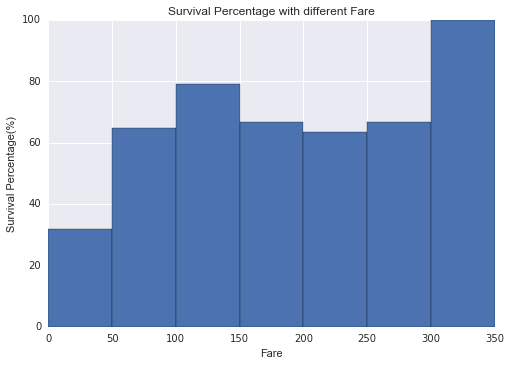

In [164]:
## Now I will stick to the relation between Fareand Survive fist.
fare1=0
fare2=0
fare3=0
fare4=0
fare5=0
fare6=0
fare7=0
fare1count=0
fare2count=0
fare3count=0
fare4count=0
fare5count=0
fare6count=0
fare7count=0
### This part of code is try to group the data in different bin according to the fare 

for fare, sur in zip(df['Fare'], df['Survived']):
    if fare>=0 and fare<50:
        fare1count=fare1count+1
        if sur==1:
            fare1=fare1+1 ## count the survival number
    if fare>=50 and fare<100:
        fare2count=fare2count+1
        if sur==1:
            fare2=fare2+1
    if fare>=100 and fare<150:
        fare3count=fare3count+1
        if sur==1:
            fare3=fare3+1
    if fare>=150 and fare<200:
        fare4count=fare4count+1
        if sur==1:
            fare4=fare4+1
    if fare>=200 and fare<250:
        fare5count=fare5count+1
        if sur==1:
            fare5=fare5+1
    if fare>=250 and fare<300:
        fare6count=fare6count+1
        if sur==1:
            fare6=fare6+1
    if fare>=300:
        fare7count=fare7count+1
        if sur==1:
            fare7=fare7+1       
fare_survive=np.array([fare1 ,fare2, fare3,fare4,fare5,fare6,fare7])
fare_total=np.array([fare1count,fare2count,fare3count,fare4count,fare5count,fare6count,fare7count])
plt.bar([0,50, 100, 150, 200, 250, 300],(fare_survive).astype(float)/fare_total*100,50)
plt.xlabel('Fare')
plt.ylabel('Survival Percentage(%)')
plt.title('Survival Percentage with different Fare')
    
        
print "Survived people:" ,fare_survive
print "Number of people:",fare_total

### After review, I know that I can use better library to save this big part of code, however I will keep it as it still do
### the job well and it can remind me don't do this again!!

survive_fare
(0, 50]         32.402235
(50, 100]       65.420561
(100, 150]      79.166667
(150, 200]      66.666667
(200, 250]      63.636364
(250, 300]      66.666667
(300, 1000]    100.000000
Name: Survived, dtype: float64


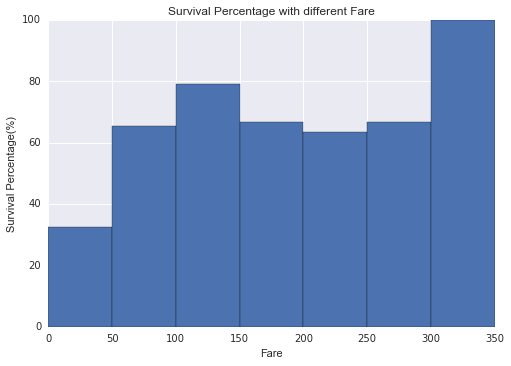

In [166]:
## I have learn to use the groupby function, which can do the job much faster
df['survive_fare']=pd.cut(df.Fare,bins=[0,50,100,150,200,250,300,1000])
print df.groupby(['survive_fare'])['Survived'].mean()*100
plt.bar([0 ,50, 100, 150, 200 ,250, 300],df.groupby(['survive_fare'])['Survived'].mean()*100,50)
plt.xlabel('Fare')
plt.ylabel('Survival Percentage(%)')
plt.title('Survival Percentage with different Fare')
## Much simpler!!

## Conclusion

Some of the data filled with many missing value , like"Cabin" with almost all missing value. In addition, I have no additional information about the Cabin data like what it means for C01 C02, therefore I can not use the data as it does not provide information. Same reason apply on "Ticket" data, it would be helpful if I get more information about what is "113803" mean.
However, for "Age", despite the incompleteness of the data, it still can be used as the portion is relatively small.  In addition, I have assume the missing data is random, thus it should not affect the analysis great. However, if it is not the case that some certain group of people missing "Age" data, it may lead to inaccurate conclusion.

In this project, I found that people sit in 1st class and people who have higher fare have higher chance, it could be explained that those 1st class and people who pay fare have a better position(ie: their seat is near the bow, therefore if the ship sink, they have more time to prepare to get out ). However, it is only correlation not casuation , it may be only by chance, or statisical related, we can not say there are causation between these variable unless we have more physical evidence(ie:if their seat really near the bow and the ships sink with it tail first.) 

It would be better to explore more variable that affect survival chance, there are many factors that can affect the survival chance. For example, health condition, weight, did people eat too much that they can not escape.

It would be interesting if I can make use of variable like" name". For example, I may divide people in group base on family name. It that the parent have a higher chance to die as they try to protect their children? However, it is beyond the scope of the project, and it will be interesting if I can do some data transformation and perform machine learning to see which features has the highest importance.
